In [112]:
import torch
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
%matplotlib inline

data = pd.read_csv("dataset.csv", encoding='utf-8')
X = data.iloc[:,:2].values[:]  
Y = data['target'].values[:]
# Y = tf.one_hot(Y, 2)
print("Y is", Y.shape)
print("x is", X[:5])
num_features = X.shape[1]

neuron = torch.nn.Sequential(
    torch.nn.Linear(num_features, out_features=2),
    torch.nn.Sigmoid()
)
neuron(torch.autograd.Variable(torch.FloatTensor([1, 1])))

Y is (1002,)
x is [[0.77942731 0.25730527]
 [0.77700501 0.0159154 ]
 [0.97709225 0.30420962]
 [0.0430319  0.1408993 ]
 [0.76043337 0.19312296]]


tensor([0.2874, 0.6387], grad_fn=<SigmoidBackward>)

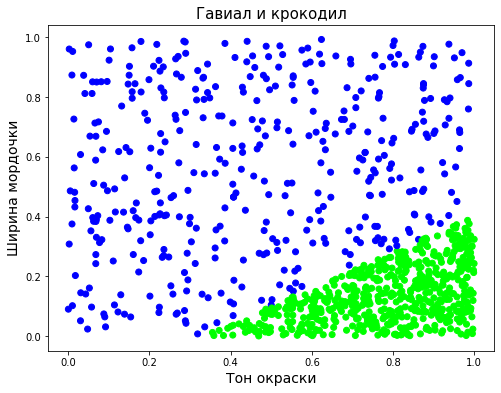

In [113]:
plt.figure(figsize=(8, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='brg')
plt.title('Гавиал и крокодил', fontsize=15)
plt.xlabel('Тон окраски', fontsize=14)
plt.ylabel('Ширина мордочки', fontsize=14)
plt.show();

In [114]:
X = torch.autograd.Variable(torch.FloatTensor(X))
Y = torch.autograd.Variable(torch.LongTensor(Y.astype(np.int64)))

loss_func = torch.nn.NLLLoss()
learning_rate = 5e-3
optimizer = torch.optim.SGD(neuron.parameters(), lr=learning_rate)
num_epochs = 500

for i in range(num_epochs):
    y_pred = neuron(X)
    loss = loss_func(y_pred, Y)
    if i % 50 == 0:
        print(f'Iter: {i} -> Loss: {loss.data}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Iter: 0 -> Loss: -0.43958497047424316
Iter: 50 -> Loss: -0.45193949341773987
Iter: 100 -> Loss: -0.4643796384334564
Iter: 150 -> Loss: -0.4768710136413574
Iter: 200 -> Loss: -0.48937687277793884
Iter: 250 -> Loss: -0.5018637776374817
Iter: 300 -> Loss: -0.5142956376075745
Iter: 350 -> Loss: -0.5266416072845459
Iter: 400 -> Loss: -0.5388702154159546
Iter: 450 -> Loss: -0.5509527921676636


In [115]:
y_pred[:5]

tensor([[0.4782, 0.6309],
        [0.4957, 0.5882],
        [0.4520, 0.6749],
        [0.5716, 0.4640],
        [0.4850, 0.6162]], grad_fn=<SliceBackward>)

In [116]:
y_pred

tensor([[0.4782, 0.6309],
        [0.4957, 0.5882],
        [0.4520, 0.6749],
        ...,
        [0.4527, 0.6739],
        [0.5066, 0.5959],
        [0.5066, 0.5959]], grad_fn=<SigmoidBackward>)